# Moving Beyond Linearity
- Linear models
  - Easy to fit
  - Linearity assumption is always an approximation
- Goal: Relax the linear assumption and try to maintain as much interpretability possible
- Approaches
  - Polynomial Regression
  - Step functions
  - Regression splines
  - Smoothing splines
  - Local regression
  - GAM (Generalized Additive Models)
## Polynomial Regression
- Convert $y_i = \beta_0 + \beta_1x_i + \epsilon_i$ with $y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + ... + \beta_d x_i^d + \epsilon_i$
- Allows to produce extremely non linear curve
- Unusual to $d$ be greater than 3 or 4
## Step Functions
- Using polynomial features imposes a global structure on the non-linear function of $X$
- Step functions
    - Break the range of $X$ into bins and fit a different constant to each bin
- Create $k$ cutpoints $c_1, c_2, c_3,...,c_k$
  - Construct $K+1$ variables $$C_0(X) = I(X < c_1) \\ C_1(X) = I (c_1 \leq  X < c_2) \\ . \\ . \\ . \\ C_k(X) = I(c_k \leq X)$$
- For any value of $X$, it must be within one of these intervals and at most one can be non-zero
- Unless there are natural breakpoints in the predictors, piecewise constants can miss the action
- Very popular in biostatistics and epidemology

## Basis Functions
$$y_i = \beta_0 + \beta_1 b_1(x_i) + \beta_2 b_2(x_i)$$ 
- $b_i$ are transformations that can be applied to the predictors
- Are fixed and known
- Piecewise constants and polynomials are special case of basis functions

## Regression Splines
### Piecewise polynomials
- Involves fitting separate low-degree polynomials over different regions of $X$
- Coefficients change in different parts of the ranges of $X$
- **Knots**: Parts where the coefficients change
$$y_i = \begin{cases} 
\beta_{01} + \beta_{11}x_i + \beta_{21}x^2_i + \beta_{31}x^3_i + \epsilon_i, & \text{if } x_i < c \\ \beta_{02} + \beta_{12}x_i + \beta_{22}x^2_i + \beta_{32}x^3_i + \epsilon_i & \text{if } x_i \geq c
\end{cases}
$$
- Above is a piecewise cubic polynomial with only one knot
- More knots leads to a more flexible piecewise polynomial
- In general, $K$ knots leads to $K+1$ different cubic polynomials
- Can lead to weird fitting curves (not continuous)
- **Constraints and splines**
  - Add constraint to the fitting curve to be continuous
  - Constraints that
    - First derivative is continuous $\rightarrow$ Continuous at a knot
    - Second derivative is continuous $\rightarrow$ Must be smooth
  - Each constraint effectively frees up one degree of freedom, by reducing the complexity of the fit
- **Spline basis representation**
  - Cubic spline with $K$ knots can be represented as $$y_i = \beta_0 + \beta_1 b_1(x_i) + \beta_2 b_2(x_i) + ... + \beta_{K+3}b_{K+3}(x_i) + \epsilon_i$$
  - Ways to represent a cubic spline
    - Start with basis for a cubic polynomial
    - Add one truncated power basis function *per knot*
    - Truncated power basis $$h(x,\xi) = (x - \xi)^3_+ = \begin{cases} (x - \xi)^3 & \text{if } x > \xi \\    0 & \text{otherwise}  \end{cases}$$ where $\xi$ is the knot
  - Splines can have high variance at the outer range of the predictors
  - **Natural spline** is a regression spline with additional boundary constraints
    - Required to be linear at the boundary
    - Produce more stable estimates at the boundaries
- **Chosing the number of knots**
  - In practice, common to place the knots in uniform fashion
  - Specify the number of desired degrees of freedom and then have the software place the corresponding number of knots at uniform quantiles of the data
  - Use cross-validation and see which produces the best curve
    - Fit a spline in the training part
    - Use the spline to make predictions on the rest of the data
    - Repeat multiple times until each observation has been left out once
- Regression splines often give superior results to polynomial regression
  - Polynomial must have high degree to be flexible, splines increases number of knots
  - Produce more stable estimates

## Smoothing Splines
- Goal: Minimize RSS $\sum_{i}^n (y_i - g(x_i))^2$
- If we dont put constraints in $g(x)$, can always make $RSS = 0$ by choosing $g$ that interpolates all of the $y_i$
- Want: Minimize RSS and $g$ to be smooth
- How to ensure $g$ is smooth? $$ \sum_{i}^n (y_i - g(x_i))^2 + \lambda \int g''(t)^2 dt$$ where $\lambda$ is a non-negative tuning parameter
  - $\sum_{i}^n (y_i - g(x_i))^2$ Encourages $g$ to fit the data well
  - $\lambda \int g''(t)^2 dt$ Penalty term that penalizes variability in $g$. Measure of the change in $g'(t)$ over its entire range
    - Term $g''(t)$ indicates the second derivative of $g$
      - $g'(t)$ measures the slope
      - $g''(t)$ measures how the slope is changing. Measure its "roughness". 
        - Large in absolute value if its wiggly near $t$ and close to zero otherwise
- When $\lambda = 0$, interpolates data perfectly. When $\lambda \rightarrow \infty$, $g$ will be perfectly smooth (just a straigh line)
- $\lambda$ controls the bias-variance tradeoff
- $g(x)$ can be shown to have specific properties
  - Piecewise cubic polynomial with knots at unique values
  - Continuous first and second derivatives at each knot
  - Linear in the region outside the knots
  - **g(x) is a natural cubic spline with knots at $x_1, x_2,...,x_n$** shrunked, with $\lambda$ controlling the level of shrinkage
- **Choosing $\lambda$**
  - $\lambda$ controls the roughness of the spline, and the *effective degrees of freedom*
  - As $\lambda$ increases from $0$ to $\infty$, the effective degrees of freedom ($df_{\lambda}$) decreases from $n$ to 2
  - Although smoothing spline has $n$ degrees of freedom, these $n$ parameters are heavily constrained
  - $df_{\lambda}$ is a measure of the flexibility of the spline (the higher, the more flexible)
  - **Effective degrees of freedom**
    - Written as $\hat{g}_\lambda = S_{\lambda}y$, where
      - $\hat{g}_\lambda$ is a solution to a particular choice of $\lambda$ ($n$-vector containing the fitted values of the smoothing spline at the training points)
      - $df_{\lambda} = \sum_i^n\{S_{\lambda}\}_{ii}$
  - In fitting a smoothing spline, we do not need to select the number of knots(knot at each training observation)
  - LOO-CV(Leave One Out Cross Validation) can be computed very effectively for smoothing splines $$RSS_{cv}(\lambda) = \sum_{i}^n (y_i - \hat{g}_\lambda^{(-i)}(x_i))^2 = 
\sum_{i}^n \left[  \frac{y_i - \hat{g}_{\lambda}(x_i) }{1 - \{S_{\lambda}\}_{ii}}      \right] $$
    - $\hat{g}_\lambda^{(-i)}$: Indicates the fitted value evaluated at $x_{i}$ where the fit uses all observation values except for $x_i$
  - If two models have similar performance, choose the one with less degrees of freedom (simpler)
## Local Regression
- Computing a fit at a target point $x_0$ using only nearby observations
- Memory-based procedure (like nearest neighbors)
- Algorithm for Local Regression
  - Gather the fraction $s=k/n$ of training points who are closest to $x_0$
  - Assign a weight $K_{i0} = K(x_i,x_0)$ to each point in its neighborhood such that
    - Point furthest has weight zero
    - Closest has the highest weight
    - All but these $k$ get weight 0
  - Fit a *weighted least square regression* of the $y_i$ on $x_i$ using the weights $$\sum_{i}^n K_{i0}(y_i - \beta_0 + \beta_1x_i)^2$$
  - Fitted value at $x_0$ is given by $\hat{f}(x_0) = \hat{\beta_0} + \hat{\beta_1}x_0$

## Generalized Additive Models
- General framework for extending linear models by allowing non-linear functions of each of the variables, while maintaining additivity
- Natural way to extend $y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_p x_{ip} + \epsilon$ is to replace each linear component with a smooth non-linear function $f_j(x_ij)$
- Using most of the methods is simple, fit one for each variable
- **GAMs with Smoothing Splines**
  - Backfitting
    - Fits a model with multiple predictors by repeatedly updating the fit for each predictor in turn, holding the others fixed
    - Apply fitting method for that variable to a partial fitting
    - Partial residual for $X_3$ is $r_i = y_i - f_1(x_{i1}) - f_2(x_{i2})$
    - Differences between GAMs using natural splines vs smoothing splines are rather small
- **Pros**
  - Fit a non-linear function on each $X_j$ automatically
  - Can make more accurate predictions
  - Because it's additive, we can examine the effect of each $X_j$ on $Y$ while keeping other variables fixed
  - Smoothness of $f_j$ can be summarized through degrees of freedom
- **Limitation**
  - Main limitation is that they are additive

# Code

## Exercise 1

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
#a)
X = np.random.normal(0,1,size=(100,2))
Y = 1.4*X[:,0] + 1.2*X[:,1] + np.random.normal(0,1,size=100) + 2.3
#b)
def simple_reg(outcome,feature):
    """
    Outcome: Array with dim (N)
    Feature: Array with dim (N)
    """
    clf = LinearRegression()
    clf.fit(feature.reshape(-1,1),outcome)
    return clf.coef_[0],clf.intercept_
#c)
beta_1 = 2
outcome_1 = Y - beta_1*X[:,0]
#d)
beta_2,beta_0 = simple_reg(outcome_1,X[:,1])
print(beta_2,beta_0)
#e)
outcome_2 = Y - beta_2*X[:,1]
beta_1, beta_0= simple_reg(outcome_2,X[:,0])
print(beta_1,beta_0)

#f)
betas_0 = []
betas_2 = []
beta_1 = 5.
betas_1 = [beta_1]
for _ in range(1000):
    outcome = Y - beta_1*X[:,0]
    beta_2,beta_0 = simple_reg(outcome,X[:,1])
    outcome = Y - beta_2*X[:,1]
    beta_1,beta_0 = simple_reg(outcome,X[:,0])
    
    betas_0.append(beta_0)
    betas_1.append(beta_1)
    betas_2.append(beta_2)        

1.102986971881275 2.371330747789837
1.2137371102326011 2.3071706252955506


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [32]:
clf = LinearRegression()
clf.fit(X,Y)
(beta_1,beta_2), beta_0 =  clf.coef_,clf.intercept_

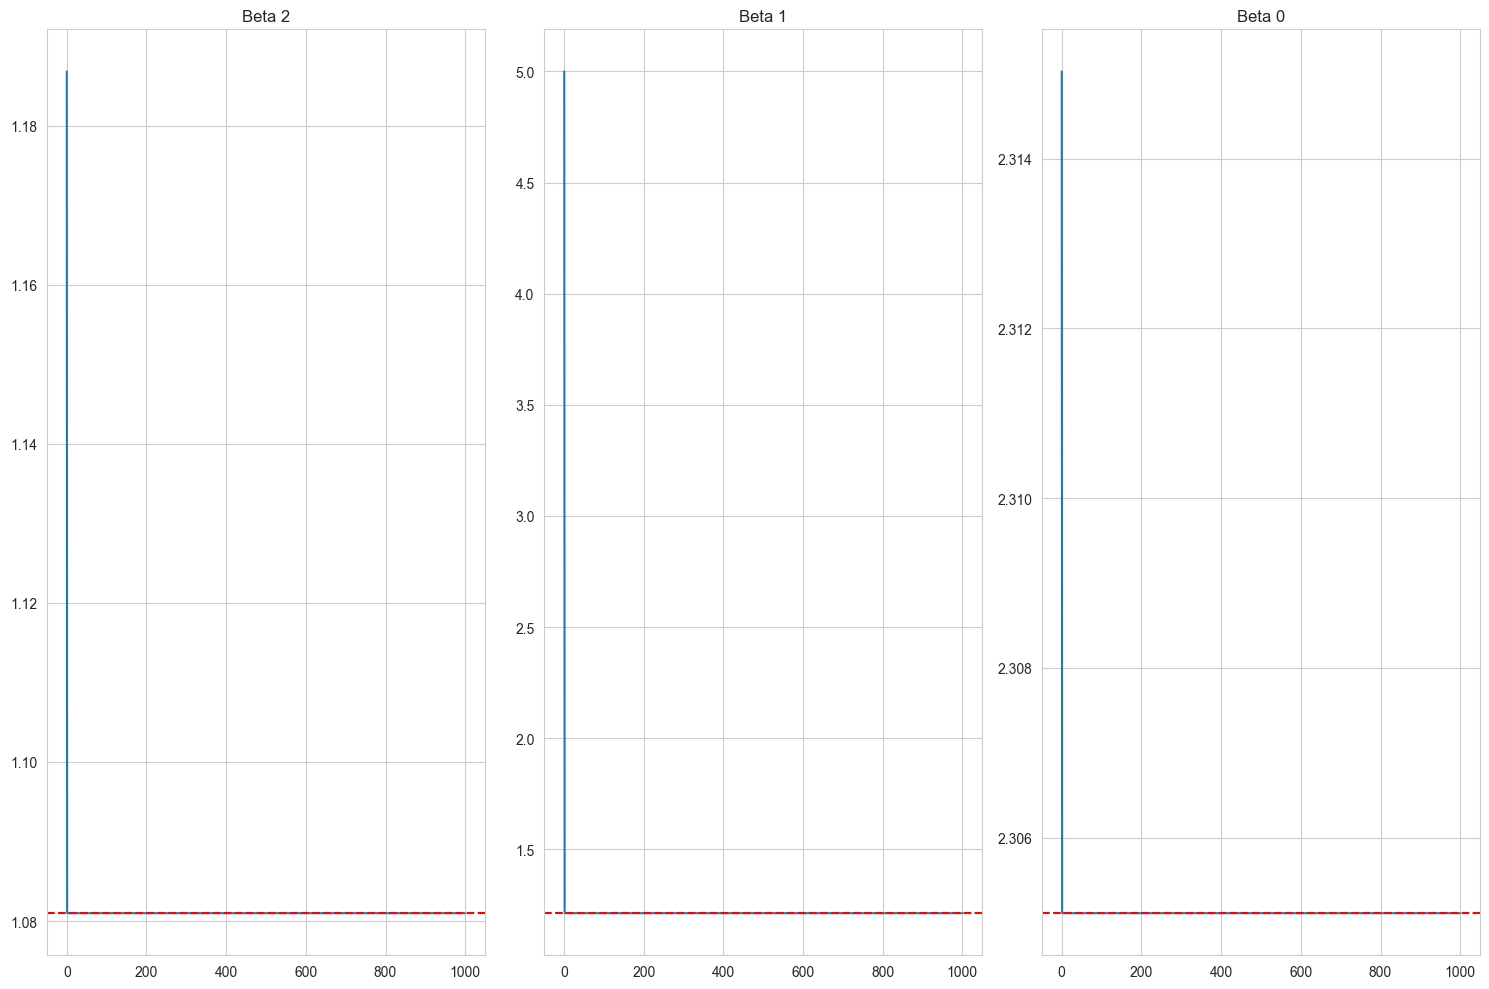

In [48]:
fig,axes = plt.subplots(figsize=(15,10),nrows=1,ncols=3)
sns.lineplot(x=np.arange(0,len(betas_2),1),y=betas_2,ax=axes[0])
sns.lineplot(x=np.arange(0,len(betas_1),1),y=betas_1,ax=axes[1])
sns.lineplot(x=np.arange(0,len(betas_0),1),y=betas_0,ax=axes[2])

axes[0].set_title('Beta 2')
axes[0].axhline(beta_2,0,1000,color='r',linestyle='--')

axes[1].set_title("Beta 1")
axes[1].axhline(beta_1,0,1000,color='r',linestyle='--')

axes[2].set_title("Beta 0")
axes[2].axhline(beta_0,0,1000,color='r',linestyle='--')

plt.tight_layout()

## Exercise 2

In [211]:
p = 100
n = 1000
X = np.random.normal(0,1,size=(n,p))
true_params = np.random.normal(loc=0,scale=1,size=p)
true_bias = np.random.randn()
y = np.dot(X,true_params) + np.random.normal(size=n)

In [212]:
true_params

array([-0.61004409, -0.51155448, -1.4677546 ,  1.31860262,  0.44618002,
       -0.14363737,  0.443081  ,  0.96437983, -1.08128966, -0.43752315,
       -0.63094115, -1.12103986,  0.34970443, -1.30701679,  1.30663691,
       -0.65194265, -1.72308937, -0.8592757 , -0.27130851, -0.48841789,
        0.46693116, -0.97029767, -0.03197092,  0.6962312 , -0.67714568,
        0.5541206 ,  0.26306432, -1.2356686 ,  1.15809695, -0.24257745,
        0.25013751, -1.53588518,  1.72015049,  0.50948408,  2.13611301,
        0.06943865, -0.80799809,  0.80930451,  0.17179721,  1.06382694,
       -1.15301631,  0.28669503, -1.06841846, -2.27780871, -0.62387356,
        0.55734273,  1.57556959, -1.71815092, -0.22287373, -0.284938  ,
       -1.04810637,  0.10626069,  0.48746286,  1.31864648, -3.00740592,
        1.3115479 ,  0.43050596, -2.06430144, -0.20369212,  1.26390153,
        0.41701071,  0.36883269,  0.60183361,  1.39121821,  1.17270557,
       -0.4109835 , -0.12233208,  0.29408003,  0.00757239,  2.19

In [213]:
clf = LinearRegression(fit_intercept=False)
clf.fit(X,y)
clf.coef_

array([-0.63436016, -0.54160592, -1.47721496,  1.33879851,  0.45937812,
       -0.2206051 ,  0.4128477 ,  1.03443565, -1.05374507, -0.40088441,
       -0.65866174, -1.19037686,  0.35077923, -1.36582573,  1.35213748,
       -0.68789793, -1.68113094, -0.82653356, -0.28858327, -0.45600964,
        0.45442604, -0.93006611, -0.02345648,  0.67643025, -0.68526602,
        0.52660243,  0.27434551, -1.19756742,  1.16442192, -0.30736645,
        0.26467218, -1.56767837,  1.67158398,  0.47375908,  2.13610034,
        0.08945172, -0.78199203,  0.77411939,  0.13499149,  1.03938966,
       -1.21669535,  0.35489926, -1.09847533, -2.25006631, -0.54823488,
        0.59696018,  1.55824737, -1.71997908, -0.17635061, -0.23696489,
       -1.06309982,  0.1075633 ,  0.5271168 ,  1.25420007, -3.03610724,
        1.32883176,  0.43431354, -2.06395391, -0.22431258,  1.258919  ,
        0.41157675,  0.35140766,  0.55031364,  1.45227106,  1.18038267,
       -0.35401846, -0.12612072,  0.29979817,  0.01172454,  2.18

In [227]:
betas = np.zeros(p)
beta_0s = []
for m in range(100):
    for j in range(p):
        X_train = X[:,j] # Train on xj considering all other functions expect xj
        X_ = np.delete(X,j,1)
        betas_ = np.delete(betas,j)
        Y_train = y - np.dot(X_,betas_)
        clf = LinearRegression(fit_intercept=False)
        clf.fit(X_train.reshape(-1,1),Y_train)
        betas[j] = clf.coef_[0]
        if j == 0:
            beta_0s.append(betas[j])

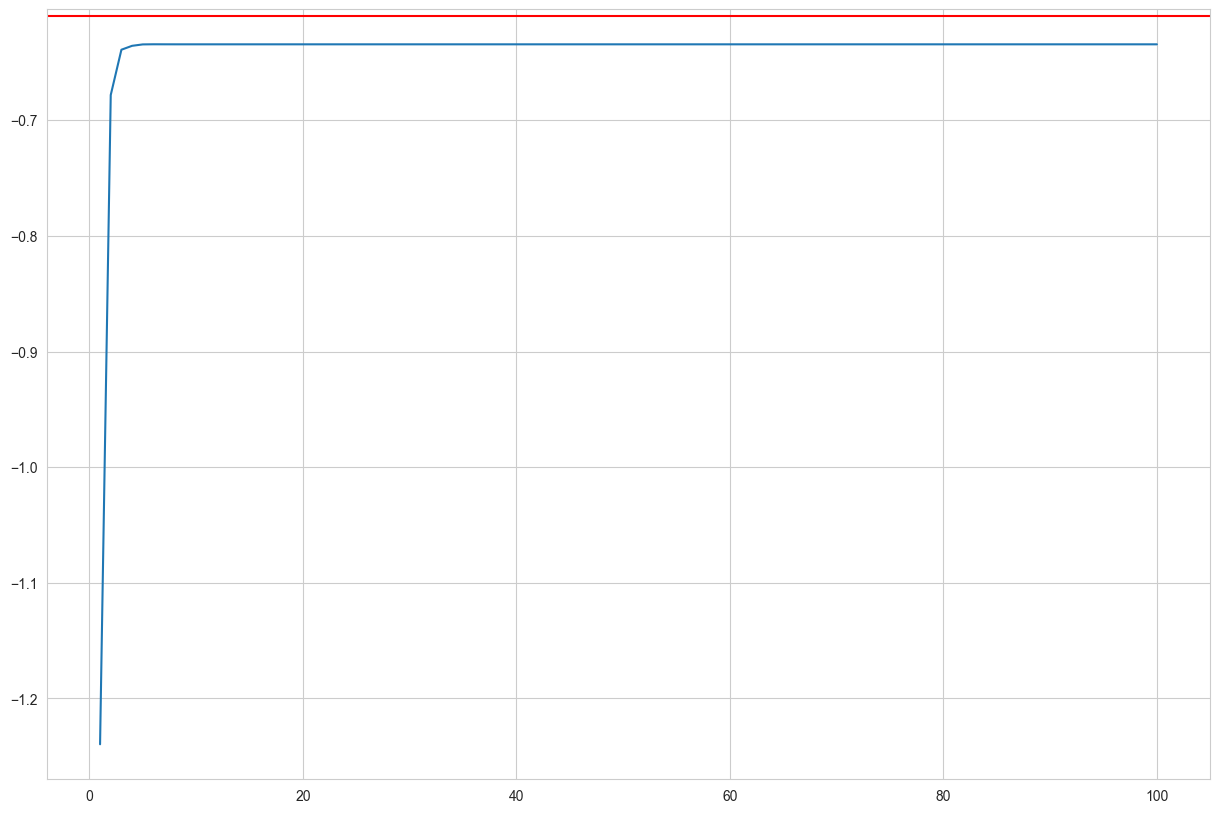

In [228]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=np.arange(1,len(beta_0s)+1,1),y=beta_0s,ax=ax)
ax.axhline(true_params[0],0,color='red')